# 앙상블 학습 - voting

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data_df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=3000)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

## soft voting

hard voting의 경우 다수결이므로 estimators는 홀수개를 사용 하는 것이 좋음

In [7]:
voting_clf = VotingClassifier(voting='soft',
    estimators=[('LR', lr_clf), ('KNN', knn_clf), ('DT', dt_clf)])

In [8]:
voting_clf

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=3000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',...
                              DecisionTreeCl

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [10]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=3000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',...
                              DecisionTreeCl

In [11]:
voting_clf.score(X_test, y_test)

0.9300699300699301

In [12]:
for cnt in voting_clf.estimators_:
    print(cnt.__class__.__name__)
    print(cnt.score(X_test, y_test))
    print()

LogisticRegression
0.9370629370629371

KNeighborsClassifier
0.8811188811188811

DecisionTreeClassifier
0.8811188811188811



# 앙상블 학습 - randomforest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [15]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
rf_clf.score(X_test,y_test)

0.951048951048951

## grid search

In [17]:
params = {
    'n_estimators':[100, 300, 500],
    'max_depth':[3, 5, 7],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=5)

In [18]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [19]:
grid_rf.score(X_test,y_test)

0.916083916083916

In [20]:
grid_rf.best_params_

{'max_depth': 3, 'n_estimators': 300, 'n_jobs': -1}

In [21]:
grid_rf.best_estimator_
# grid_rf.estimator : 원래인 rf_clf의 estimator를 의미
# _가 뒤에 붙은 것이 학습 이후를 의미

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
rf_importance = pd.Series(grid_rf.best_estimator_.feature_importances_,
                          index=data.feature_names).sort_values(ascending=False)

In [23]:
import matplotlib.pyplot as plt

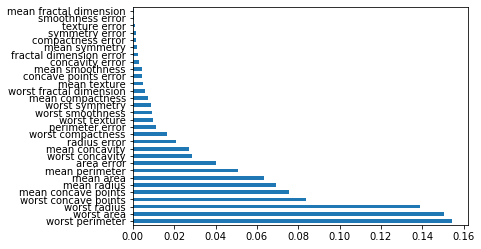

In [24]:
rf_importance.plot(kind = 'barh')
plt.show()

In [25]:
import seaborn as sns

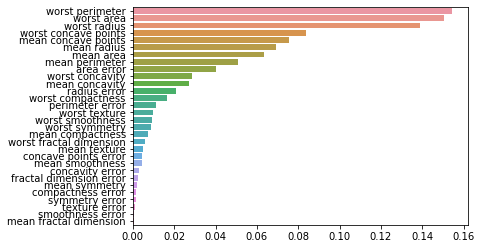

In [26]:
sns.barplot(x=rf_importance, y=rf_importance.index)
plt.show()

# 앙상블 학습 - boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb_clf = GradientBoostingClassifier()
gb_params ={
    'n_estimators':[100,300],
    'learning_rate':[0.05, 0.1],
    'max_depth':[3, 5]
}

In [29]:
grid_gb = GridSearchCV(gb_clf, param_grid=gb_params, cv=5)

In [32]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [33]:
grid_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

In [37]:
grid_gb.best_estimator_.feature_importances_

array([2.70371413e-04, 5.69272711e-03, 2.57155490e-04, 5.44864926e-04,
       5.28930200e-03, 3.90206769e-03, 2.64970646e-02, 1.44770307e-02,
       1.42270609e-03, 8.70202033e-05, 1.31129411e-02, 4.75537024e-04,
       2.86449555e-03, 9.30858793e-03, 2.86708636e-03, 1.34587250e-02,
       2.42530927e-03, 1.64822810e-03, 8.88050880e-04, 2.34342298e-03,
       5.88422456e-01, 4.57657396e-02, 3.43872602e-02, 1.44344886e-01,
       1.45829753e-02, 2.09780981e-04, 5.17621364e-03, 5.85493822e-02,
       5.83394253e-04, 1.45217526e-04])